In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/usr/lib64/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/usr/lib64/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


## Exploratory Data Analysis

In [4]:
train_df = pd.read_csv('../train.csv', index_col='id') #set index on 'id' column
test_df = pd.read_csv('../test.csv', index_col='id')

In [5]:
train_df.head()

,amount_value,amount_currency,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardNumber,paymentMethod_cardType,paymentMethod_cardSubType,paymentMethod_cvv,paymentMethod_encodedPaymentToken,paymentMethod_expiryMonth,paymentMethod_expiryYear,transaction_time,class
id,,,,,,,,,,,,,,,,,
0,18253.30,USD,virtual,edge,pos,134.93.42.168,544011954,magstripe,2174-3628-6995-3987,JCB,Student,61,szQSTkeL,6,2027,2020-08-30 05:21:24,0
1,15870.89,USD,virtual,chrome,pos,78.92.229.26,9718272187,nfcc,4498-2553-8930-9552,JCB,Student,200,fdptXXrc,1,2026,2020-09-03 23:21:01,0
2,41109.80,USD,online,chromio,pos,197.84.118.231,1659938058,magstripe,8246-8688-8907-4387,JCB,Prepaid,259,UTXzvode,0,2021,2020-08-03 11:43:53,1
3,70604.95,USD,virtual,chrome,mobile,192.113.64.253,986924301,magstripe,3563-5044-6927-1494,JCB,Business,685,gVRZqrdu,7,2023,2020-07-22 04:28:32,0
4,51216.66,USD,virtual,chrome,mobile,48.81.200.252,9399699174,nfcc,4253-0351-2318-7737,JCB,Business,131,FGZLLHSX,6,2025,2020-02-29 13:35:21,0


In [6]:
test_df.head()

,amount_value,amount_currency,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardNumber,paymentMethod_cardType,paymentMethod_cardSubType,paymentMethod_cvv,paymentMethod_encodedPaymentToken,paymentMethod_expiryMonth,paymentMethod_expiryYear,transaction_time,class
id,,,,,,,,,,,,,,,,,
0,85621.45,USD,virtual,chrome,pos,225.76.238.186,2534859727,magstripe,6444-9854-4855-9248,Discover,Student,394,uCuKsvrW,0,2024,2020-09-05 23:30:39,1
1,6885.37,USD,online,edge,pos,22.235.47.168,3373234617,magstripe,7374-1462-5965-4580,JCB,Business,480,lVYWecct,9,2021,2020-08-04 07:08:00,0
2,60146.36,USD,virtual,edge,pos,34.50.211.154,4596280497,chip,2366-2404-8271-1630,Discover,Student,263,iXTHSnGH,11,2022,2020-08-02 18:52:19,0
3,40372.97,USD,virtual,edge,mobile,35.47.40.5,7486781647,magstripe,1528-9270-7336-2735,Visa,Business,469,nFnmjYWb,1,2027,2020-06-24 18:42:29,1
4,43803.75,USD,virtual,chrome,pos,247.164.216.72,8375107852,nfcc,8977-0947-5649-8057,Visa,Student,162,gMcMMAuC,4,2026,2020-03-19 18:53:16,1


In [7]:
train_df.shape

(100000, 17)

In [8]:
test_df.shape

(10000, 17)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
amount_value                         100000 non-null float64
amount_currency                      100000 non-null object
channel                              100000 non-null object
deviceDetails_browser                100000 non-null object
deviceDetails_device                 100000 non-null object
deviceDetails_deviceIp               100000 non-null object
merchantRefTransactionId             100000 non-null int64
paymentMethod_apmType                100000 non-null object
paymentMethod_cardNumber             100000 non-null object
paymentMethod_cardType               100000 non-null object
paymentMethod_cardSubType            100000 non-null object
paymentMethod_cvv                    100000 non-null int64
paymentMethod_encodedPaymentToken    100000 non-null object
paymentMethod_expiryMonth            100000 non-null int64
paymentMethod_expiryYear             100000 non-null

We can clearly see that <b>we don't have any null values</b> in the data which is bound to happen in such datasets as each and every information is very necessary else the transaction isn't processed.

### Columns story
- <b>integer type columns</b>: 
    - merchantRefTransactionId, 
    - paymentMethod_cvv, 
    - paymentMethod_cvv,
    - paymentMethod_expiryMonth,
    - paymentMethod_expiryYear.
- <b>float type columns</b>: amount_value.
- <b>object (str) type columns</b>: 
    - amount_currency,
    - channel,
    - deviceDetails_browser, 
    - deviceDetails_device,
    - deviceDetails_deviceIp,
    - paymentMethod_apmType,
    - paymentMethod_cardNumber,
    - paymentMethod_cardType,
    - paymentMethod_cardSubType, 
    - paymentMethod_encodedPaymentToken.    
- <b>object (date) type columns</b>: transaction_time.

In [10]:
train_df.columns

Index(['amount_value', 'amount_currency', 'channel', 'deviceDetails_browser',
       'deviceDetails_device', 'deviceDetails_deviceIp',
       'merchantRefTransactionId', 'paymentMethod_apmType',
       'paymentMethod_cardNumber', 'paymentMethod_cardType',
       'paymentMethod_cardSubType', 'paymentMethod_cvv',
       'paymentMethod_encodedPaymentToken', 'paymentMethod_expiryMonth',
       'paymentMethod_expiryYear', 'transaction_time', 'class'],
      dtype='object')

In [11]:
train_df.dtypes

amount_value                         float64
amount_currency                       object
channel                               object
deviceDetails_browser                 object
deviceDetails_device                  object
deviceDetails_deviceIp                object
merchantRefTransactionId               int64
paymentMethod_apmType                 object
paymentMethod_cardNumber              object
paymentMethod_cardType                object
paymentMethod_cardSubType             object
paymentMethod_cvv                      int64
paymentMethod_encodedPaymentToken     object
paymentMethod_expiryMonth              int64
paymentMethod_expiryYear               int64
transaction_time                      object
class                                  int64
dtype: object

### Features histogram 

In [13]:
numerical_columns = ['merchantRefTransactionId', 'paymentMethod_cvv', 
                     'paymentMethod_expiryMonth', 'paymentMethod_expiryYear',
                     'amount_value']

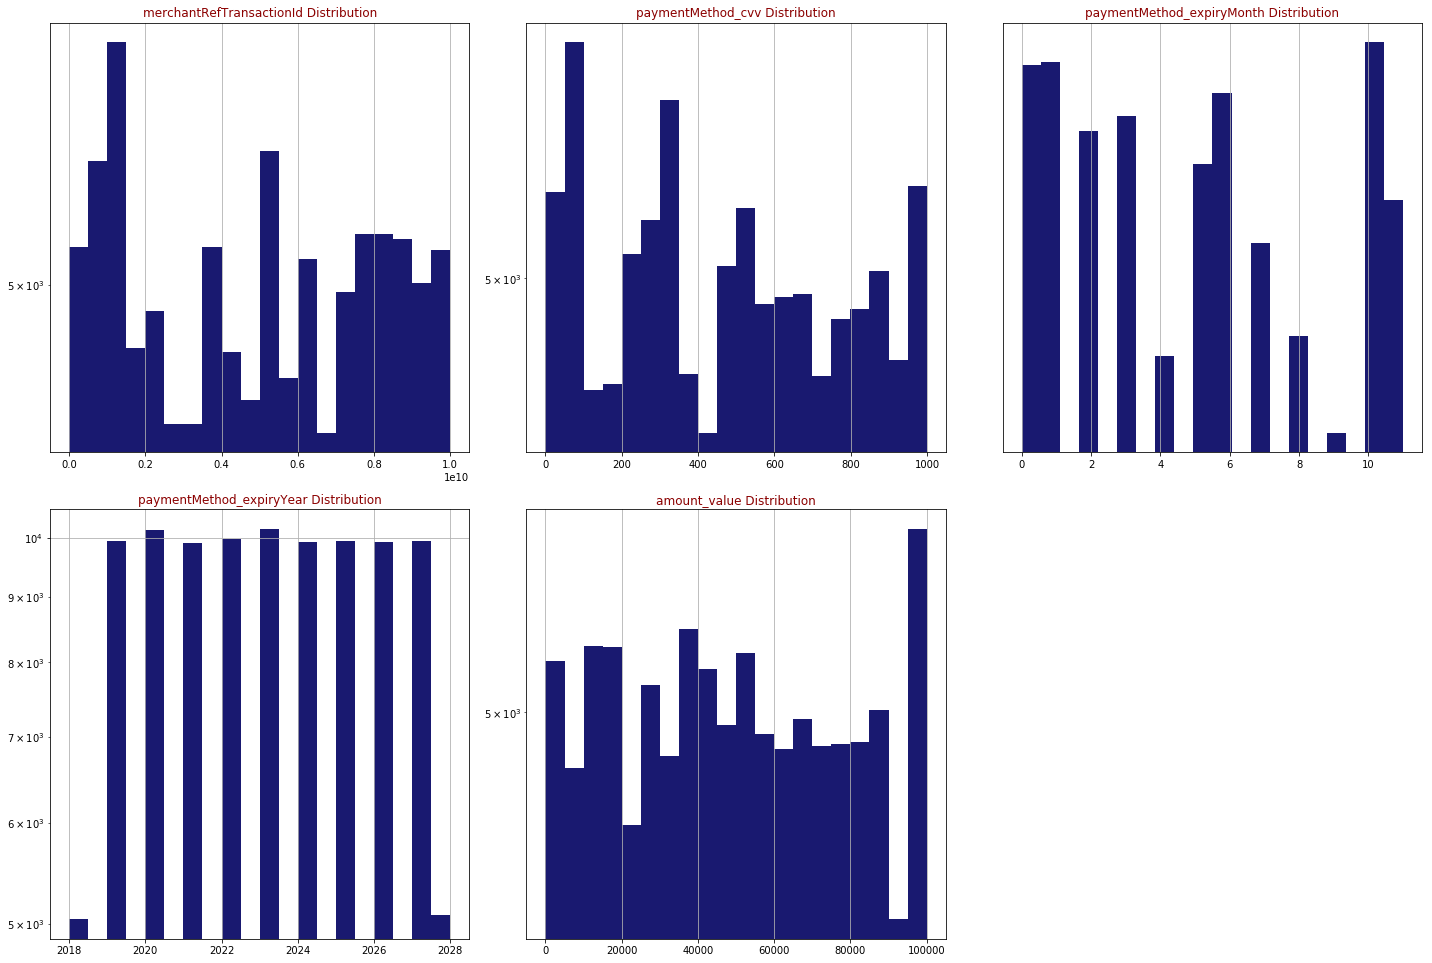

In [14]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(numerical_columns):
    ax=fig.add_subplot(3,3,i+1)
    train_df[feature].hist(bins=20,
                            ax=ax,
                            facecolor='midnightblue')
    ax.set_title(feature+" Distribution", color='DarkRed')
    ax.set_yscale('log')
fig.tight_layout()  
plt.show()

### Fraudulent vs. Non-Fraudulent Transactions
- balanced data set

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

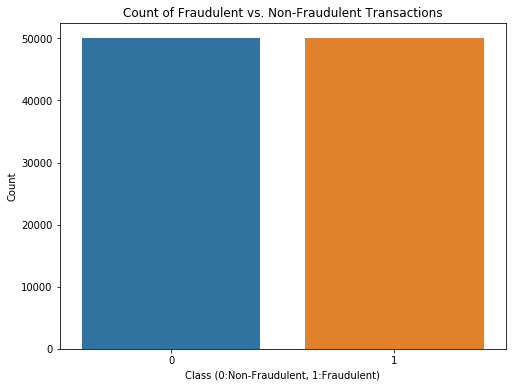

In [15]:
new_counts = train_df['class'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

### transaction_time in the foreground

In [17]:
initial_time = list(train_df['transaction_time'])

In [18]:
time_in_seconds = []
for time_val in initial_time:
    date_time_obj = datetime.datetime.strptime(time_val, '%Y-%m-%d %H:%M:%S')
    time_in_seconds.append(date_time_obj.timestamp())

In [19]:
train_df = train_df.assign(time_in_seconds = time_in_seconds)

In [20]:
dif_time = []
the_older_trans_date = min(time_in_seconds)
for time_val in time_in_seconds:
    delta = time_val - the_older_trans_date
    dif_time.append(delta)

In [21]:
train_df = train_df.assign(time_dif = dif_time)

In [22]:
train_df.sort_values(by=['time_dif'], inplace=True)

In [23]:
train_df.head()

,amount_value,amount_currency,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardNumber,paymentMethod_cardType,paymentMethod_cardSubType,paymentMethod_cvv,paymentMethod_encodedPaymentToken,paymentMethod_expiryMonth,paymentMethod_expiryYear,transaction_time,class,time_in_seconds,time_dif
id,,,,,,,,,,,,,,,,,,,
49602,17516.75,USD,virtual,edge,mobile,87.48.27.99,6876758664,magstripe,3553-5297-8108-7720,JCB,Student,101,vnlNRRAb,7,2026,2020-01-01 13:35:45,1,1.577879e+09,0.0
62605,10239.05,USD,pos,chrome,pc,156.54.194.200,1231308167,nfcc,3800-0146-6060-1696,Visa,Student,543,AbjNfVQA,1,2027,2020-01-01 13:35:56,1,1.577879e+09,11.0
30869,79725.01,USD,virtual,edge,pc,218.49.51.250,9908617220,nfcc,9248-7493-5771-1710,JCB,Student,896,tUGnKUiz,7,2019,2020-01-01 13:39:40,1,1.577879e+09,235.0
92700,16589.65,USD,virtual,edge,pc,17.60.35.199,8733780365,magstripe,1188-7983-8754-2387,Discover,Prepaid,478,DBHuKkYw,5,2027,2020-01-01 13:51:33,1,1.577879e+09,948.0
69792,44131.26,USD,virtual,edge,pc,125.131.62.127,9463391174,magstripe,7456-4857-8718-1108,Discover,Business,510,pmeNcqSB,3,2023,2020-01-01 13:59:17,0,1.577880e+09,1412.0


### Normalized or not time_dif?
<b>Time variable is also not normalized.</b> So it must be normalized.



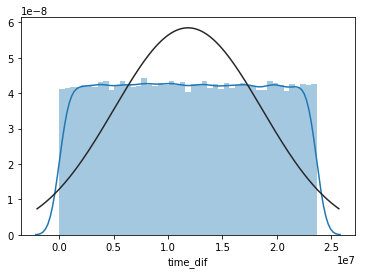

In [24]:
sns.distplot(train_df['time_dif'], fit=stats.norm)

In [25]:
train_df['norm_time_dif'] = StandardScaler().fit_transform(train_df[['time_dif']])

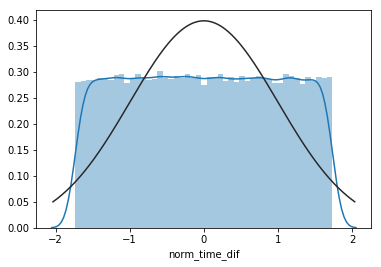

In [26]:
sns.distplot(train_df['norm_time_dif'], fit=stats.norm)

### Normalized or not amount_value?
Clearly the amount_value variable is not normalized, so we'll normalize it frist.

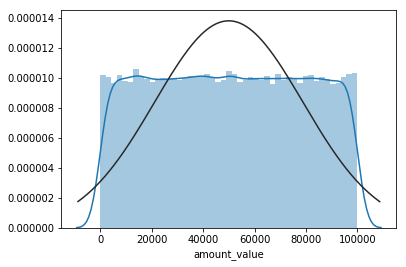

In [27]:
sns.distplot(train_df['amount_value'],fit=stats.norm)

In [28]:
train_df['norm_amount'] = StandardScaler().fit_transform(train_df[['amount_value']])

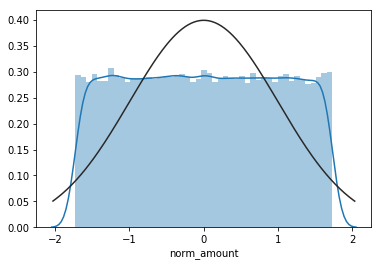

In [29]:
sns.distplot(train_df['norm_amount'],fit=stats.norm)

### When do people shop?
Try to visualize when people shop and whan credit fraud happens and if there is a pattern.

!! NO PATTERNS FOUND.

In [30]:
time_anaysis = train_df[['transaction_time', 'amount_value', 'class']].copy()

In [31]:
def convert_to_dt(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S')

In [32]:
time_anaysis['transaction_time'] = time_anaysis.transaction_time.apply(convert_to_dt)

In [33]:
time_anaysis['hour_of_the_day'] = time_anaysis.transaction_time.dt.hour

In [34]:
time_analysis_grouped = time_anaysis.groupby(['class', 'hour_of_the_day'])['amount_value'].count()

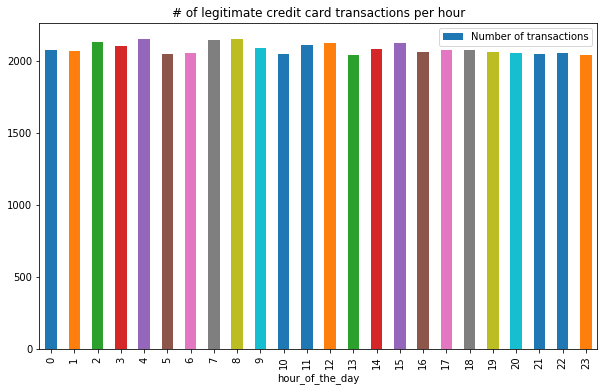

In [35]:
plt.figure(figsize = (10, 6))
valid_transactions = time_analysis_grouped[0].copy()
valid_transactions.name = 'Number of transactions'
valid_transactions.plot.bar(title = '# of legitimate credit card transactions per hour', legend = True)

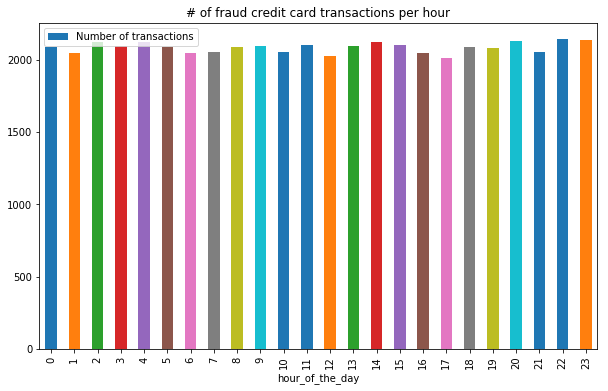

In [36]:
plt.figure(figsize = (10, 6))
fraud_transactions = time_analysis_grouped[1].copy()
fraud_transactions.name = 'Number of transactions'
fraud_transactions.plot.bar(title = '# of fraud credit card transactions per hour', legend = True)

### Are fraudulent transactions of higher value than non-fraudulent transactions?
It would be interesting to see if fraudulent transactions are in general higher value than non-fraudulent transactions or not. 

The <b>Null</b> hypothesis (H0): <i>Fraudulent transactions are of similar or lower value as normal transactions.</i>

The <b>Alternative</b> hypothesis (HA): <i>Fraudulent transactions are of higher value as normal transactions.</i>

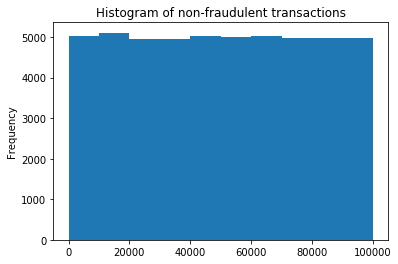

In [37]:
time_anaysis[time_anaysis['class'] == 0].amount_value.plot.hist(title='Histogram of non-fraudulent transactions')

In [38]:
np.mean(time_anaysis.amount_value)

49964.62104850062

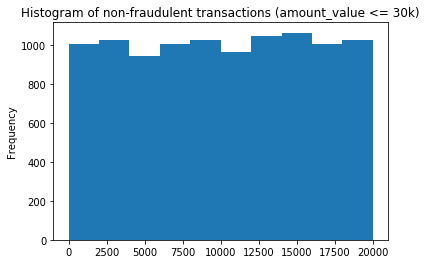

In [39]:
# As the value of most transaction seems to be only about 15k - 20k. 
# Lets limit the data further

time_anaysis[(time_anaysis['class'] == 0) & 
             (time_anaysis.amount_value <= 20000)].amount_value.plot.hist(title = 'Histogram of non-fraudulent transactions (amount_value <= 30k)')

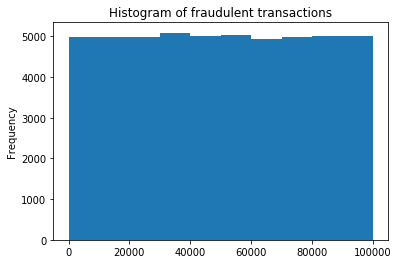

In [40]:
time_anaysis[time_anaysis['class'] == 1].amount_value.plot.hist(title = 'Histogram of fraudulent transactions')

In [41]:
len(time_anaysis[time_anaysis['class'] == 1])

50025

There doesn't appears to be any difference visually.
For the hypothesis test I will be performing a Z-test, with the valid transactions acting as the population. 

In [42]:
population = time_anaysis[time_anaysis['class'] == 0].amount_value
sample = time_anaysis[time_anaysis['class'] == 1].amount_value
sample_mean = sample.mean()
population_std = population.std()
population_mean = population.mean()

In [43]:
z_score = (sample_mean - population_mean) / (population_std / sample.size ** 0.5)
z_score

0.6103437308975733

As the z-score is more than 2.326 we reject the Null hypothesis. 

So there is a 99% chance that the amount spend on fraudulent transactions are on average similar or lower value as normal transactions. 
As it can be observed in the histograms in absolute terms normal transactions almost the same value with fraudulent transactions.

###  EDA - Second chance (let's see better)
- plot the amount of transactions vs. time for fraudulent and non-fraudulent as welll as the distributions of amounts for each case.

Does the fraudulent transactions have higher or lower amounts (on average) than non-fraudulent and if they follow any temoporal pattern?

In [44]:
df= train_df

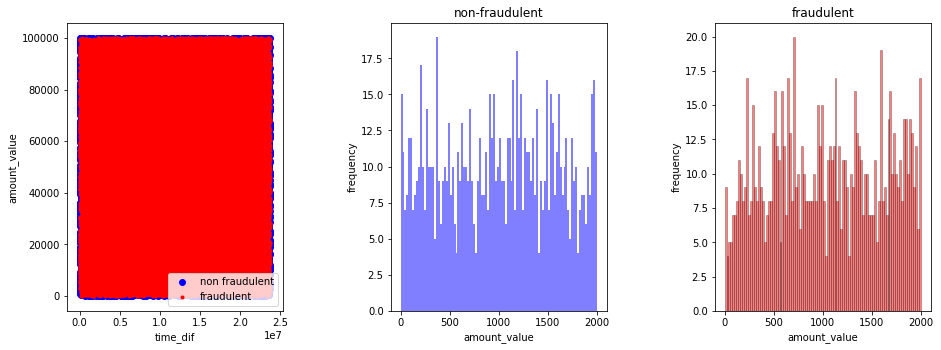

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3)
ax[0].scatter(df['time_dif'][df['class'] == 0], 
              df['amount_value'][df['class']==0], 
              color='b' )
ax[0].scatter(df['time_dif'][df['class'] == 1], 
              df['amount_value'][df['class']==1], 
              color='r' , marker='.')
ax[0].legend(['non fraudulent', 'fraudulent'], loc='best')
ax[1].hist(df['amount_value'][df['class']==0], 100, facecolor='b', alpha=0.5,
           label="Distribution of amounts for non-fraudulent", range = [0,2000])
ax[2].hist( df['amount_value'][df['class']==1], 100, facecolor='r', ec="black", lw=0.5, alpha=0.5, 
           label="Distribution of amounts for fraudulent", range = [0,2000])
ax[0].set_xlabel("time_dif")
ax[0].set_ylabel("amount_value")
ax[1].set_xlabel("amount_value")
ax[1].set_ylabel("frequency")
ax[2].set_xlabel("amount_value")
ax[2].set_ylabel("frequency")
ax[1].set_title('non-fraudulent')
ax[2].set_title('fraudulent')
fig.subplots_adjust(left=0, right=2, bottom=0, top=1, hspace=0.05, wspace=0.5)